Creado por [Mauricio Lozada](https://www.instagram.com/maudinnok/)

Este es un ejercicio de Análisis de Datos con Python. Usando el conjunto de datos de ***California Housing Prices*** extraído de Kaggle: https://www.kaggle.com/datasets/camnugent/california-housing-prices

In [2]:
import pandas as pd

datos = pd.read_csv("housing.csv")

In [3]:
datos.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
datos["ocean_proximity"].value_counts() #Datos para ver cuantos estan cerca de la bahia

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
datos.info() #para ver si no hay nulos. En este caso vemos que faltan 200 registros, lo que nos indica que hay datos nulos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
datos.describe() #Resumen estadístico de las columnas numéricas en el DataFrame

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Podemos observar en esta parte que La *Edad media de las casas* es de 28 años.
La edad mínima es de 1 año.
Y la edad máxima es de 52 años.

Así mismo podemos observar que los *Ingresos* podemos ver que él mínimo de ingresos es de 0.5, es decir 5 mil dolares anuales, y el máximo es de 150 mil dolares.
La mayoría estan ganando entre 5 mil y 50 mil dolares.

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

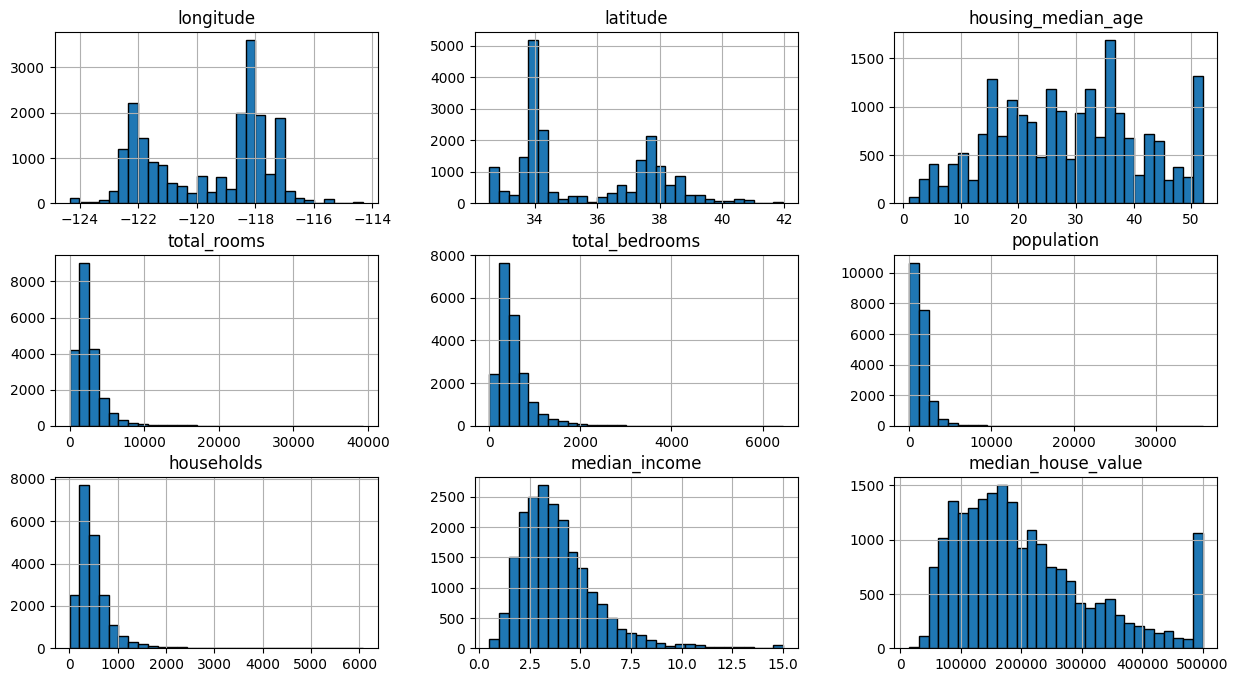

In [7]:
datos.hist(figsize=[15,8], bins=30, edgecolor="black") #Creamos un histograma.

Podemos observar con estos histogramas que la media de casas, estan entre los 10 y 40 años de antigüedad.
La mayoría de gráficas tienen un patrrón similar, donde la mayoría se desplazan a la izquierda mostrando el máximo y van disminuyendo hacía la derecha.

En cuanto a la media de los ingresos, podemos observar lo mismo, vemos que hay una media de personas ganando entre 2.5 y 5.0 y en 15 (o sea 150 mil) los pusieron hasta el final y hay un pequeño pico en esa parte de la gráfica.
Igual lo podemos ver en la gráfica del precio de las casas, por eso al final de la gráfica se ven los precios de arriba de 500,000.

TypeError: cannot convert the series to <class 'float'>

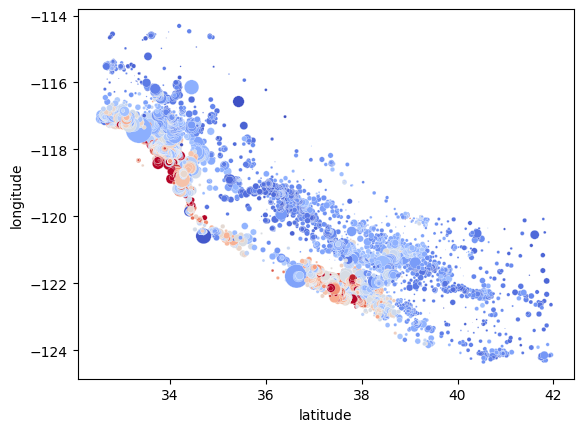

In [8]:
#Visualización de datos Seaborn
import seaborn as sb
sb.scatterplot(x="latitude", y="longitude", data=datos, hue="median_house_value", palette="coolwarm",
               s=datos["population"]/100)

Probablemente veas que los datos estan distribuidos de manera no habitual, pero la verdad si miras un mapa del estado de California, te darás una idea que los datos estan distribuidos por las zonas de California.
Si te das cuenta, las casas más cercanas al mar, son las que tienden a cser más caras. https://www.pinterest.es/pin/488288784581226679/

<Axes: xlabel='latitude', ylabel='longitude'>

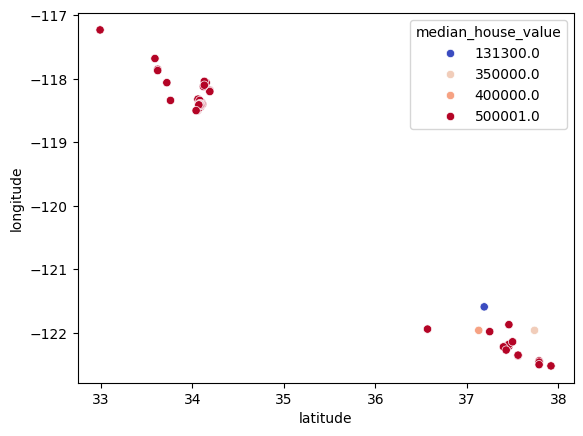

In [9]:
#gráfico de dispersión enfocado en visualizar cómo el valor mediano de las viviendas varía en áreas con ingresos medianos superiores a 14
sb.scatterplot(x="latitude", y="longitude", data=datos[(datos.median_income > 14)], hue="median_house_value", palette="coolwarm")

In [10]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
datos_na = datos.dropna() #para eliminar los 200 registros nulos

In [12]:
datos_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [13]:
#Convertir la característica categórica a numerica.
#Proximidad al oceano
datos_na["ocean_proximity"]

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20433, dtype: object

In [14]:
datos_na["ocean_proximity"].value_counts()
#1,2,3,4,5

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

Debemos convertir la columna categórica "ocean_proximity" del DataFrame datos_na en variables dummy (también conocidas como variables indicadoras o one-hot encoding).

 Esta función se utiliza para convertir variables categóricas en un DataFrame de variables dummy/indicadoras. Es una técnica común de preprocesamiento de datos utilizada para convertir atributos categóricos en formatos numéricos que pueden ser procesados por algoritmos de machine learning, ya que muchos de estos algoritmos requieren que la entrada sea numérica.

In [15]:
#Dummies / One-Hot Encoding
#Near Bay  INLAND   NEAR OCEAN
#   1         0          0
#   0         0          1

dummies = pd.get_dummies(datos_na["ocean_proximity"], dtype = int)

In [16]:
datos_na = datos_na.join(dummies)

 *dummies*, es un DataFrame donde cada fila corresponde a una observación del DataFrame original datos_na, y cada columna representa una categoría única encontrada en "ocean_proximity". Por ejemplo, si "ocean_proximity" tuviera las categorías "Near Ocean" y "Inland", el DataFrame dummies tendría una columna para "Near Ocean" y otra para "Inland", con 1s y 0s indicando la pertenencia de cada observación a esas categorías.

Este enfoque es particularmente útil para preparar los datos para análisis y modelos predictivos, ya que facilita la inclusión de información categórica de manera que los algoritmos puedan procesarla eficazmente.

In [17]:
datos_na.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0


In [18]:
#quitamos ahora la columna de ocean_proximity porque ya no la necesitamos
datos_na.drop(["ocean_proximity"], axis=1) #axis=1 significa que quite una columna

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


In [19]:
datos_na.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0


#Analisis, nuevas caracteristicas

In [20]:
datos.corr() #Correlaciones

<ipython-input-20-616d89d74c02>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  datos.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


<ipython-input-21-d3d7a0b1aa0c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(datos_na.corr(), annot=True, cmap="YlGnBu")


<Axes: >

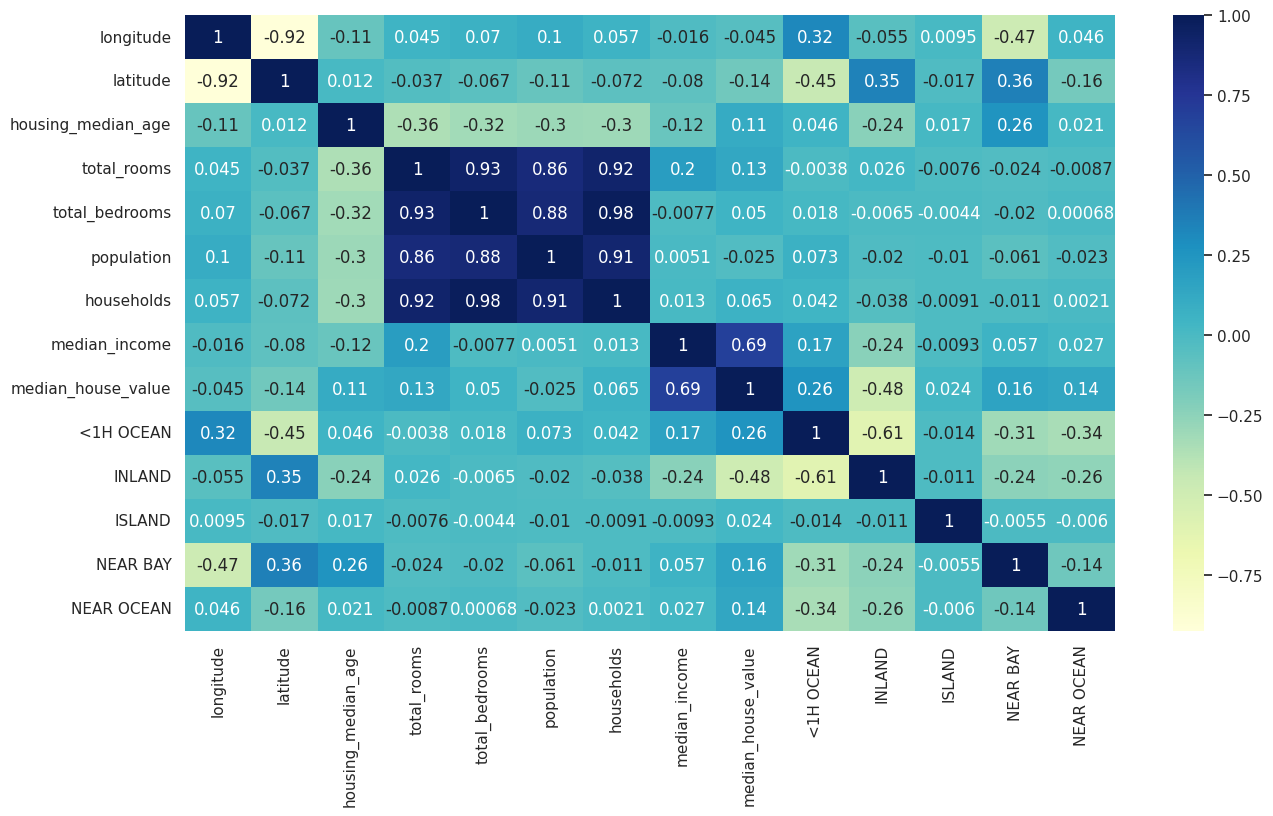

In [21]:
sb.set(rc={'figure.figsize': (15,8)})
sb.heatmap(datos_na.corr(), annot=True, cmap="YlGnBu")

Esta gráfica es importante, porque nos muestras toda la relación que hay entre todos los datos de nuestro conjunto. Y la relación que nos quiere mostrara, es que si modifico un valor, qué tanto cambia otro valor.



*   Un 1 es una relación perfecta.
*   Un -1 es una relación inversa. Si uno baja, el otro sube.
*   Un 0 significa que no hay relación.



# Análisis

---


Empezemos con la etiqueta del *Precio de la casa*: **Tenemos un 0.69**, el cual representa la Media de Ingresos de ese bloque.
Nos dice que entre más ingresos tiene la gente de ese bloque, más dinero cuestan esas casas.

Igual tenemos una relación positiva que nos dice que mientras más cuartos, más cuesta la casa (x=*median_house_value*, y=*total_rooms*) con un valor de **0.13**.

O que si esta a menos de una hora del oceano cuesta más, pero si esta en el interior, cuesta menos. (x= *median_house_value*, y= <1H Ocean).

Incluso podemos ver una relación negativa con la latitud. Es decir, mientras disminuye la latitud, más aumenta el precio. (x= *median_house_value*, y=*latitude*) **-0.14**

**En este caso nos interesa más el valor de las casas y podríamos concentrarnos sólo en median_house_value para saber la relación de este valor con relación de los demás**, asi que:

In [22]:
datos.corr()["median_house_value"].sort_values(ascending=False)

<ipython-input-22-93707dad8018>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  datos.corr()["median_house_value"].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

En esta parte, podemos ver más a detalle la relación del precio de las casas con la *Media de Ingresos*, el *Total de Cuartos*, etc hasta la *Latitud* en orden descendiente.
